In [1]:
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.insert(0,"../")
from utils import sph_utils

## With Spherical harmonics

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.11801923541125049


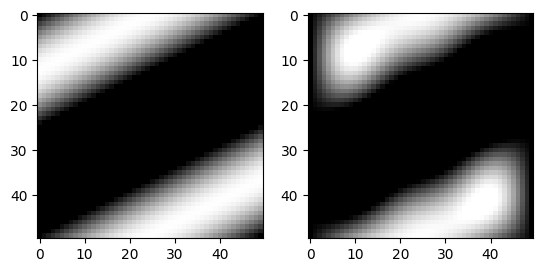

In [21]:
def f(theta, phi):
    return np.sin(theta + phi)

my_basis = sph_utils.SphHarmBasis(n_coeffs=25)

# encode your function in the desired basis and record the coefficients
my_coeffs = my_basis.sph_harm_transform(f)

# reconstruct your function at a point
point = (np.pi/8, np.pi/8)
my_basis.sph_harm_reconstruct(my_coeffs)(*point), f(*point)
my_reconstr_function = my_basis.sph_harm_reconstruct(my_coeffs)

pts_phi = np.linspace(0, 2*np.pi)
pts_theta = np.linspace(0, np.pi)
pts_2d = np.reshape(np.stack(np.meshgrid(pts_theta,pts_phi), axis=-1), (-1, 2))

actual = []
approx = []

pts_total = 0

for n, pt in enumerate(pts_2d):
    f_actual = f(*pt)
    f_approx = my_reconstr_function(*pt)
    
    actual.append(f_actual)
    approx.append(f_approx)

    pts_total += abs(f_approx - f_actual)
    
print(pts_total / len(pts_2d))

plt.subplot(121)
plt.imshow(np.reshape(np.repeat(actual, 3), (50, 50, 3)))

plt.subplot(122)
plt.imshow(np.reshape(np.repeat(approx, 3), (50, 50, 3)))
plt.show()

In [101]:
Img = np.reshape(np.repeat(approx, 3), (50, 50, 3))

In [102]:
Img.shape

(50, 50, 3)

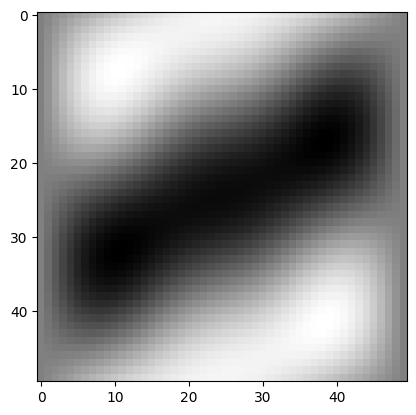

In [104]:
plt.imshow(np.reshape(np.repeat(approx, 3), (50, 50, 3))[:,:,0], cmap='gray')

## With Wavelets

In [22]:
# make sure the notebook reloads the module each time we modify it
%load_ext autoreload
%autoreload 2

# Uncomment the next line if you want to be able to zoom on plots (one of the options below)
#%matplotlib widget
%matplotlib inline 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import matplotlib.image as mpimg

from scipy.signal import *
from scipy.stats import *
from scipy.io.wavfile import *
from scipy.io import *
from numpy.fft import *
from matplotlib.colors import LogNorm # for Log normalization

from lib.module_TDS import *
from lib.plotwavelet import *

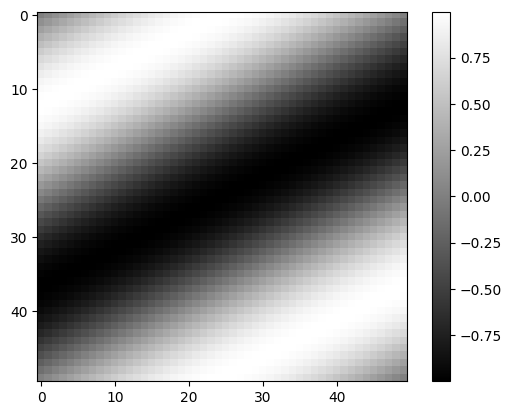

In [84]:
I = np.reshape(np.repeat(actual, 3), (50, 50, 3))[:,:,0]

plt.figure()
plt.imshow(I, cmap='gray')
plt.colorbar()
plt.show()

In [105]:
# Wavelet decomposition
Jmax = int(np.log2(I.shape[0]))  # maximal number of octaves
J = 5

wtcoeffs = pywt.wavedec2(I, wavelet='sym8', level=J)

/home/besnier/phd/projects/bm-shapes/env/lib/python3.8/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


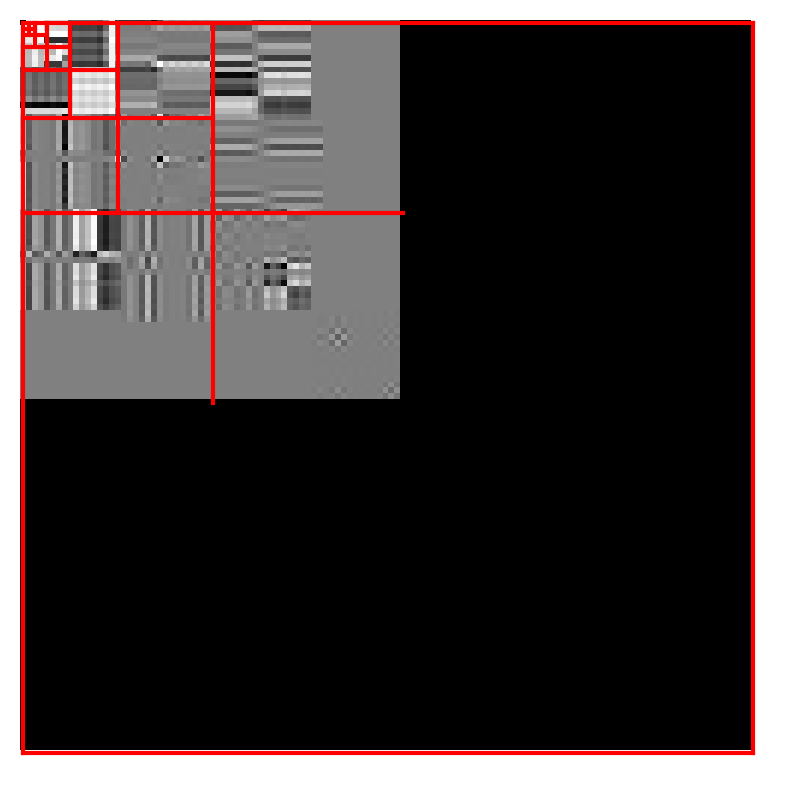

In [106]:
# Casting coeff in a single array
wtcoeffs_arr, coeff_slices = pywt.coeffs_to_array(wtcoeffs)

# Graphical representation
plt.figure(figsize=(5, 5), dpi=200)
plot_wavelet(wtcoeffs_arr, Jmin=Jmax-J);

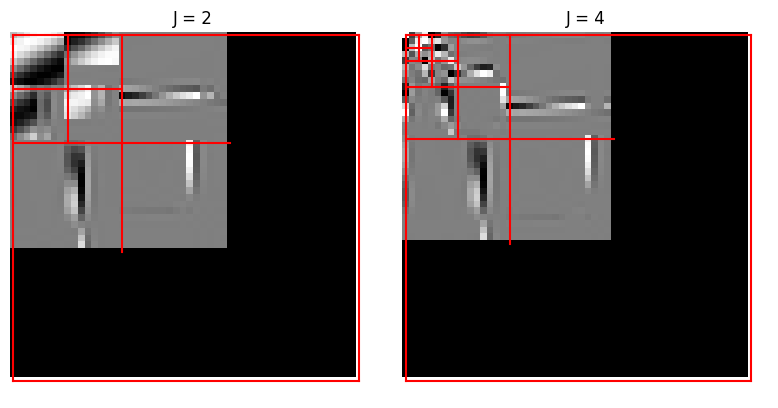

In [107]:
# Wavelet decomposition
Jmax = int(np.log2(I.shape[0]))  # maximal number of octaves
j = [2, 4]  

figure(figsize=(8,8))
i=1
for J in j:
    wtcoeffs = pywt.wavedec2(I, wavelet='sym8', level=J, mode ='periodization')
    
    # Casting coeff in a single array
    wtcoeffs_arr, coeff_slices = pywt.coeffs_to_array(wtcoeffs)

    # Graphical representation
    subplot(2,2,i)
    plot_wavelet(wtcoeffs_arr, Jmin=Jmax-J)
    title('J = ' + str(J))
    
    i+= 1
    
tight_layout()
show()

In [108]:
coeffs2 = pywt.wavedec2(I, 'sym8', level = 4)

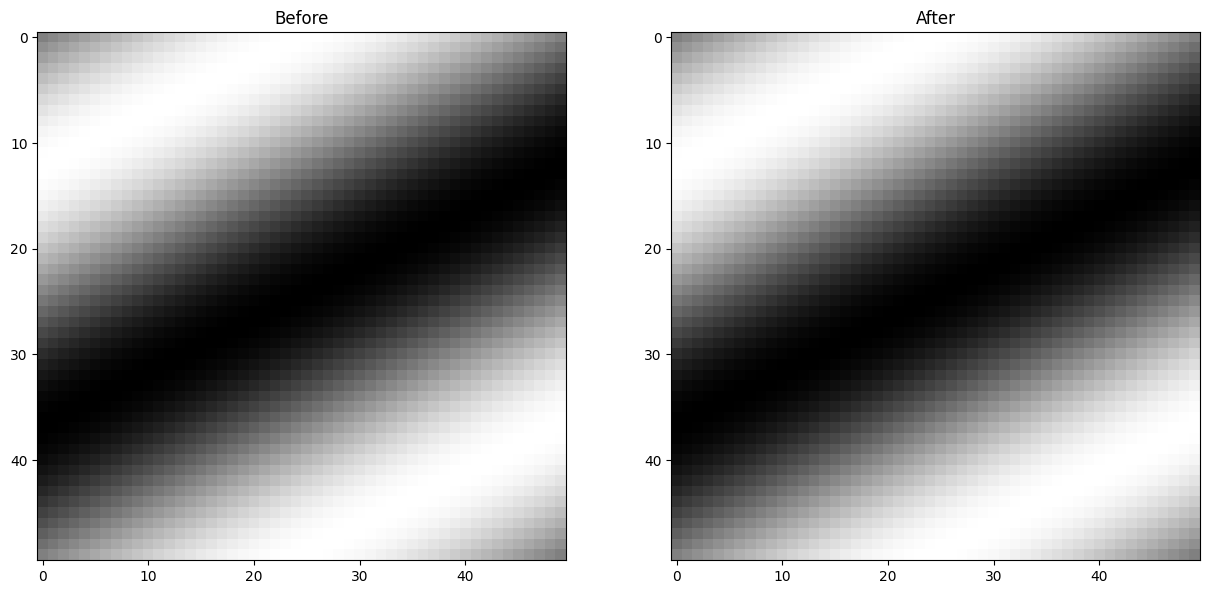

In [109]:
I_d = pywt.waverec2(coeffs2, 'sym8')
fig = plt.figure(figsize=(15, 7))
subplot(121)
plt.imshow(I, cmap='gray')
title('Before')
# plt.colorbar()
subplot(122)
plt.imshow(I_d, cmap='gray')
title('After')
# plt.colorbar()
plt.show()

In [110]:
I_d

array([[ 1.62068275e-13,  6.40702200e-02,  1.27877162e-01, ...,
         1.27877162e-01,  6.40702200e-02,  1.83835586e-13],
       [ 1.27877162e-01,  1.91158629e-01,  2.53654584e-01, ...,
         2.16136137e-13, -6.40702200e-02, -1.27877162e-01],
       [ 2.53654584e-01,  3.15108218e-01,  3.75267005e-01, ...,
        -1.27877162e-01, -1.91158629e-01, -2.53654584e-01],
       ...,
       [-2.53654584e-01, -1.91158629e-01, -1.27877162e-01, ...,
         3.75267005e-01,  3.15108218e-01,  2.53654584e-01],
       [-1.27877162e-01, -6.40702200e-02,  2.19472010e-13, ...,
         2.53654584e-01,  1.91158629e-01,  1.27877162e-01],
       [ 2.82357471e-13,  6.40702200e-02,  1.27877162e-01, ...,
         1.27877162e-01,  6.40702200e-02,  6.90489332e-14]])